## Load the data

In [1]:
############## create sql table ################
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

dbname = 'stack_exchange_rnn_db'
q_tbname = 'question_table'
a_tbname = 'answer_table'
username = 'dan-laptop'
import os
password = os.environ['PGRES_PASSWORD']

engine = create_engine('postgresql://%s:%s@localhost:5432/%s'%(username,password,dbname))

## Now access sql db from python
con = None
connect_str = "dbname='%s' user='%s' host='localhost' password='%s'"%(dbname,username,password)
con = psycopg2.connect(connect_str)
cur = con.cursor() #create cursor for communicating with sql

almost 88k questions which is a little over 1/2 the python questions asked in 2015...

In [3]:
import pandas as pd
################# make query ########################
sql_query = 'SELECT q_id, view_count,score FROM question_table;'
question_df = pd.read_sql_query(sql_query,con)
question_df.head()

,q_id,view_count,score
0,33660178,94,0
1,29972894,2859,0
2,32276493,8166,11
3,32586454,2936,-2
4,28136104,3748,4


In [4]:
sql_query = 'SELECT * FROM question_table;'
question_df = pd.read_sql_query(sql_query,con)
question_df.to_csv('question_db.csv')

sql_query = 'SELECT * FROM answer_table;'
question_df = pd.read_sql_query(sql_query,con)
question_df.to_csv('answer_db.csv')

In [5]:
question_df.head()

,id,a_id,q_id,word_vec,score
0,1,0,33660178,"the,error,object,may,read,from,the,network,net...",0
1,2,1,33660178,"this,is,what,i,did,worked,for,me,when,reading,...",0
2,3,0,29972894,"possible,duplicate,stackoverflow,com,questions...",0
3,4,1,29972894,"you,are,looking,for,idxmax,in,1332,x,out,1332,...",2
4,5,2,29972894,"x,max,x,max,x,max,axis,1,max,index,this,works,...",0


## Explore View Count

In [4]:
len(question_df)

138286

In [5]:
print(len(question_df.view_count))

138286


In [6]:
print(question_df.view_count.max())

433072


In [7]:
print(question_df.view_count.min())

5


In [8]:
print(sum(question_df.view_count>100))

75058


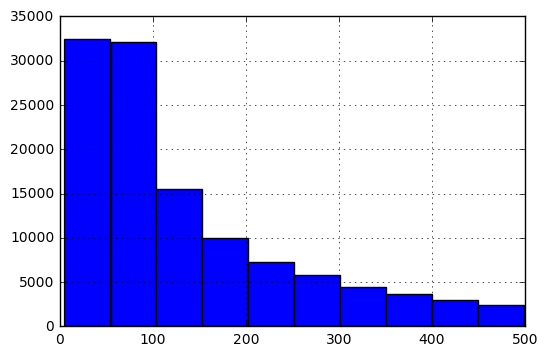

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

question_df[question_df['view_count']<500]['view_count'].hist();

In [10]:
import numpy as np
np.sum(question_df['view_count']<51)/len(question_df['view_count'])

0.20320205949987707

In [11]:
################# make query ########################
sql_query = 'SELECT word_vec,score FROM answer_table;'
question_df = pd.read_sql_query(sql_query,con)
print(question_df.shape)

(499225, 2)


In [12]:
################# make query ########################
sql_query = """
    SELECT answer_table.word_vec, answer_table.score 
    FROM answer_table
    INNER JOIN question_table
        on answer_table.q_id = question_table.q_id
        and question_table.view_count > 50;
"""
question_df = pd.read_sql_query(sql_query,con)
print(question_df.shape)
question_df.head()

(411190, 2)


,word_vec,score
0,"you,need,to,define,a,badge,model,as,well,and,d...",3
1,"you,can,read,a,large,file,one,line,at,a,time,i...",1
2,"this,would,be,eaily,accomplised,with,something...",0
3,"in,my,opinion,the,easiest,way,would,be,to,use,...",1
4,"biopython,should,be,able,to,read,in,large,fast...",0


## Explore Answer Score

In [ ]:
from nltk.tokenize import PunktSentenceTokenizer
question_df['word_vec'].values

custom_sent_tokenizer = PunktSentenceTokenizer(train_text) #A
tokenized = custom_sent_tokenizer.tokenize(sample_text)   #B

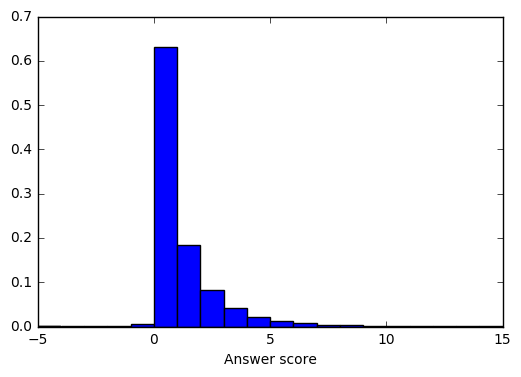

In [16]:
#import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#sns.set_context("poster")
plt.Figure()
#sns.distplot(question_df['score'],bins=20,kde=False, hist_kws={"range":(-5,15)}, norm_hist=True)
plt.hist(question_df['score'],bins=20,range=(-5,15), normed=True,color='b')
plt.xlim((-5,15))
plt.xlabel('Answer score')
#plt.savefig('answer_scores.png')
#plt.savefig('answer_scores.svg')
plt.show()

In [22]:
np.sum(question_df['score']==2)

33665

In [37]:
question_df.to_csv('answers_50more_views.csv')

In [47]:
len(question_df)

410757

In [48]:
import numpy as np
threshold = 2

y = question_df['score'].copy()
y[y<threshold] = 0
y[y>0] = 1
print(np.mean(y))

0.1797169616099056


In [ ]:
########## Close Connections ##############
cur.close()
con.close()